In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rc('font',**{'family':'serif','serif':['serif']})
mpl.rc('text', usetex=True)
import fitsio as fio

import h5py

import copy

import xpipe.tools.catalogs as catalogs
import xpipe.paths as paths
import xpipe.xhandle.parbins as parbins
import xpipe.xhandle.xwrap as xwrap
import xpipe.tools.selector as selector
import xpipe.xhandle.shearops as shearops
import xpipe.xhandle.pzboost as pzboost
import xpipe.tools.y3_sompz as sompz
import xpipe.tools.mass as mass
import xpipe.tools.visual as visual


from importlib import reload
import pickle


import astropy.cosmology as cosmology
# this is just the default cosmology
cosmo = cosmology.FlatLambdaCDM(Om0=0.3, H0=70)

# we make sure the correct config file is loaded here, it will let us automatically now what type of files 
# were / will be produced, and where they will be placed
paths.update_params("/home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm-test_meta.yml")

reading DEFAULTS from default_params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm_meta.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm-test_meta.yml

***********************

running in test / development mode

***********************



In [7]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)

In [8]:
flist

['test-meta_v01_y3lens_qbin-0-0.dat']

In [9]:
scinvs = np.array((1, 1))

In [10]:
target = fio.read("/e/eser2/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/test-meta_v01/test-meta_v01_y3lens_qbin-0-0.fits")

In [11]:
weights = pd.DataFrame()
weights["MEM_MATCH_ID"] = target["MEM_MATCH_ID"].byteswap().newbyteorder()
weights["WEIGHT"] = target["Z"].byteswap().newbyteorder()

In [12]:
i = 0
ACP = shearops.AutoCalibrateProfile([flist[i],], flist_jk[i], None, sbins=(1, 2), xlims=(0.01, 100))
ACP.get_profiles(scinvs=scinvs, ismeta=False, weights=weights, weight_key="WEIGHT", id_key="MEM_MATCH_ID")

loading source bin 1
103.82793
loading source bin 2
103.82793


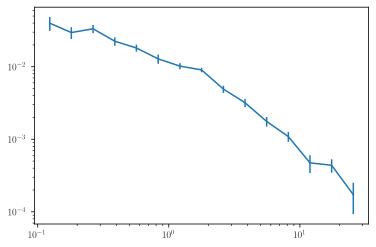

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(ACP.rr, ACP.dst, ACP.dst_err)
ax.set_xscale("log")
ax.set_yscale("log")

In [14]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [15]:
rtarget = fio.read("/e/eser2/vargatn/DES/DES_Y3A2_cluster/data/lenscat/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_randcat_z0.10-0.95_lgt020_vl02.fit")

In [16]:
table = pd.DataFrame(rtarget)

In [ ]:
table

In [17]:
weights = pd.DataFrame()
weights["ID"] = np.arange(len(rtarget))
weights["WEIGHT"] = rtarget["ZTRUE"].byteswap().newbyteorder()

In [26]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [31]:
i = 0
rACP = shearops.AutoCalibrateProfile([rlist[i],], rlist_jk[i], None, sbins=(1, 2), xlims=(0.01, 100))
rACP.get_profiles(ismeta=False, scinvs=scinvs)
prof1 = copy.deepcopy(rACP.profile)
rACP.get_profiles(scinvs=scinvs, ismeta=False, weights=weights, weight_key="WEIGHT", id_key="ID")
prof2 = copy.deepcopy(rACP.profile)

loading source bin 1
loading source bin 2
loading source bin 1
275.43915
loading source bin 2
275.43915


In [33]:
prof1.dst / prof2.dst

array([ 0.88139903,  1.06996768,  0.72718023,  0.10093059,  1.04454025,
        1.12342635,  0.96069158,  0.86826415,  1.09446156, -3.48183107,
        1.72356219,  0.90216872,  0.9103468 ,  0.57813697,  1.01691717])

In [23]:
rACP.weights

ID    WEIGHT
0              0  0.426082
1              1  0.426082
2              2  0.426082
3              3  0.426082
4              4  0.426082
...          ...       ...
3782225  3782225  0.576055
3782226  3782226  0.576055
3782227  3782227  0.576055
3782228  3782228  0.576055
3782229  3782229  0.576055

[3782230 rows x 2 columns]